In [1]:
import numpy as np

from pyoints import (
    storage,
    Extent,
    transformation,
    filters,
    registration,
    normals,
)

In [2]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

%matplotlib inline

In [3]:
A = storage.loadPly('data/ArmadilloBack2/ArmadilloBack_1.ply')
print(A.shape)
print(A.dtype.descr)

(19283,)
[('coords', '>f4', (3,))]


In [4]:
B = storage.loadPly('data/ArmadilloBack2/ArmadilloBack_2.ply')
print(B.shape)
print(B.dtype.descr)

(19283,)
[('coords', '>f4', (3,))]


In [5]:
C = storage.loadPly('data/ArmadilloBack2/ArmadilloBack_3.ply')
print(C.shape)
print(C.dtype.descr)

(19283,)
[('coords', '>f4', (3,))]


In [6]:
r = 0.004
A = A[list(filters.ball(A.indexKD(), r))]
B = B[list(filters.ball(B.indexKD(), r))]
C = C[list(filters.ball(C.indexKD(), r))]

In [7]:
axes_lims = Extent([
    A.extent().center - 0.5 * A.extent().ranges.max(),
    A.extent().center + 0.5 * A.extent().ranges.max()
])
colors = {'A': 'green', 'B': 'blue', 'C': 'red'}

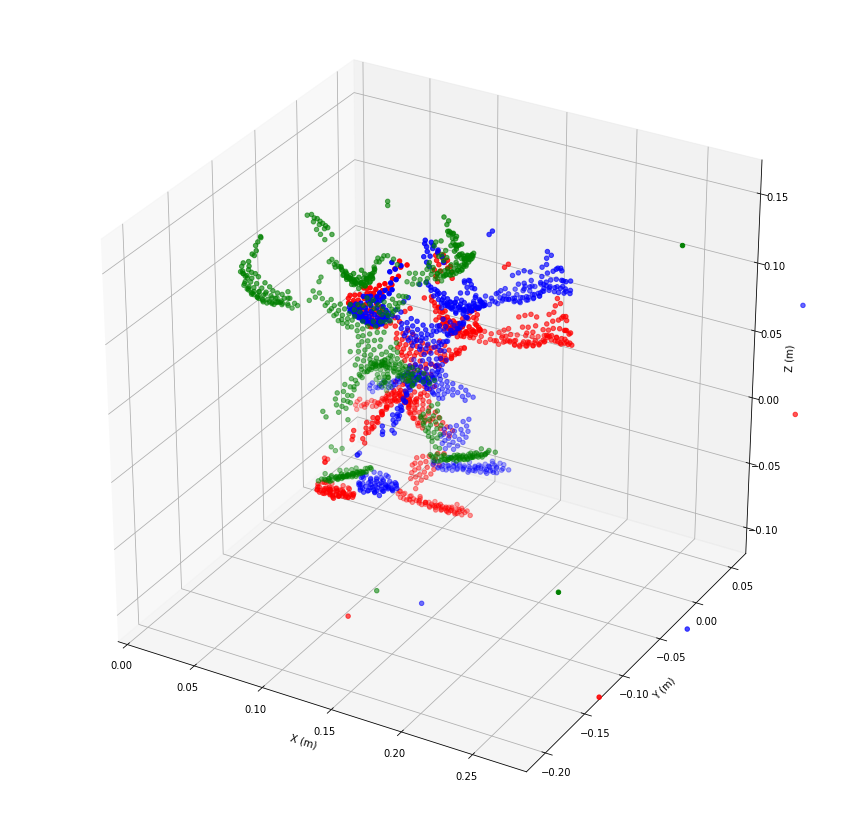

In [8]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.set_xlim(axes_lims[0], axes_lims[3])
ax.set_ylim(axes_lims[1], axes_lims[4])
ax.set_zlim(axes_lims[2], axes_lims[5])
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')

ax.scatter(*A.coords.T, color=colors['A'])
ax.scatter(*B.coords.T, color=colors['B'])
ax.scatter(*C.coords.T, color=colors['C'])
plt.show()


In [9]:
T_A = transformation.r_matrix([15*np.pi/180, 10*np.pi/180, 5*np.pi/180])
A.transform(T_A)
T_B = transformation.r_matrix([5*np.pi/180, -8*np.pi/180, -14*np.pi/180])
B.transform(T_B)
T_C = transformation.r_matrix([-2*np.pi/180, 13*np.pi/180, 18*np.pi/180])
C.transform(T_C)

rec.array([([ 1.21856838e-01,  2.40278570e-03,  7.53100514e-02],),
           ([ 1.12902038e-01,  3.92457703e-03,  7.56824613e-02],),
           ([ 1.18583523e-01, -3.62053863e-04,  7.43744671e-02],),
           ([ 1.14940070e-01, -2.49321270e-03,  7.34049380e-02],),
           ([ 1.23578176e-01, -7.33692665e-03,  7.19641373e-02],),
           ([ 1.10865690e-01,  3.62720340e-02,  6.75261542e-02],),
           ([ 1.19744599e-01, -9.44661256e-03,  7.04559535e-02],),
           ([ 1.20186858e-01, -1.63895581e-02,  7.01076090e-02],),
           ([ 1.23333462e-01, -1.36124007e-02,  6.87138438e-02],),
           ([ 1.13771982e-01,  3.75315212e-02,  6.50514066e-02],),
           ([ 1.16275556e-01, -1.80736557e-02,  6.89145401e-02],),
           ([ 1.08050354e-01,  3.58371809e-02,  6.45222664e-02],),
           ([ 1.20489061e-01, -1.49833113e-02,  6.62101284e-02],),
           ([ 1.10978127e-01,  3.85071151e-02,  6.18389957e-02],),
           ([ 1.14964589e-01,  3.88971195e-02,  6.08055219e-02

In [10]:
axes_lims = Extent([
    A.extent().center - 0.5 * A.extent().ranges.max(),
    A.extent().center + 0.5 * A.extent().ranges.max()
])

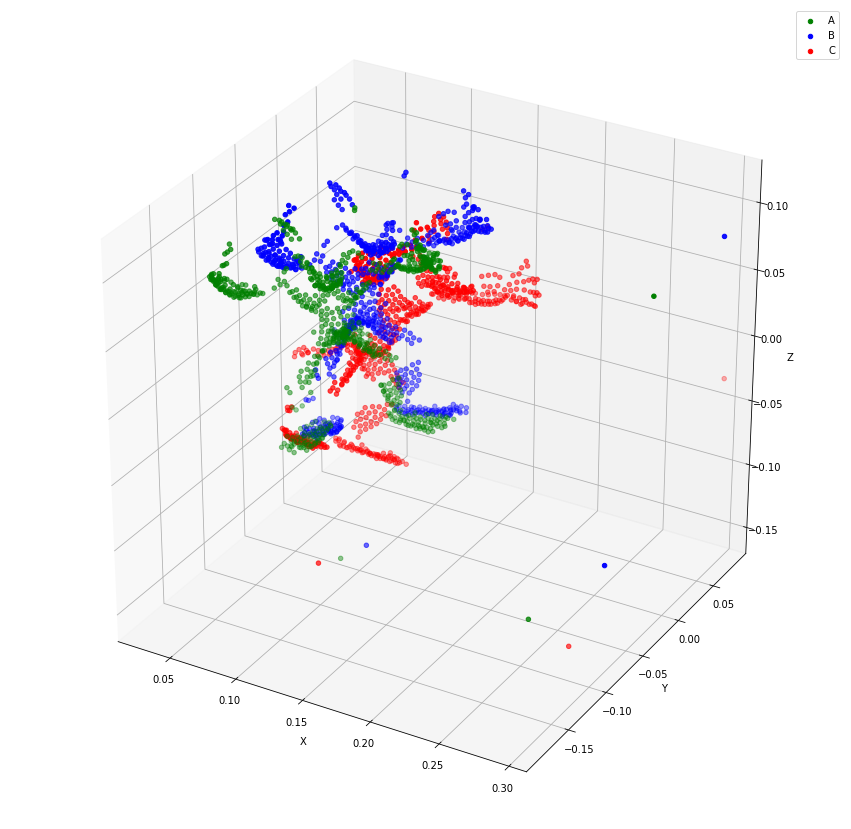

In [11]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.set_xlim(axes_lims[0], axes_lims[3])
ax.set_ylim(axes_lims[1], axes_lims[4])
ax.set_zlim(axes_lims[2], axes_lims[5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(*A.coords.T, color=colors['A'], label='A')
ax.scatter(*B.coords.T, color=colors['B'], label='B')
ax.scatter(*C.coords.T, color=colors['C'], label='C')
ax.legend()
plt.show()

In [12]:
coords_dict = {
    'A': A.coords,
    'B': B.coords,
    'C': C.coords
}

In [13]:
d_th = 0.04
radii = [d_th, d_th, d_th]
icp = registration.ICP(
    radii,
    max_iter=60,
    max_change_ratio=0.000001,
    k=1
)

In [14]:
T_dict, pairs_dict, report = icp(coords_dict)

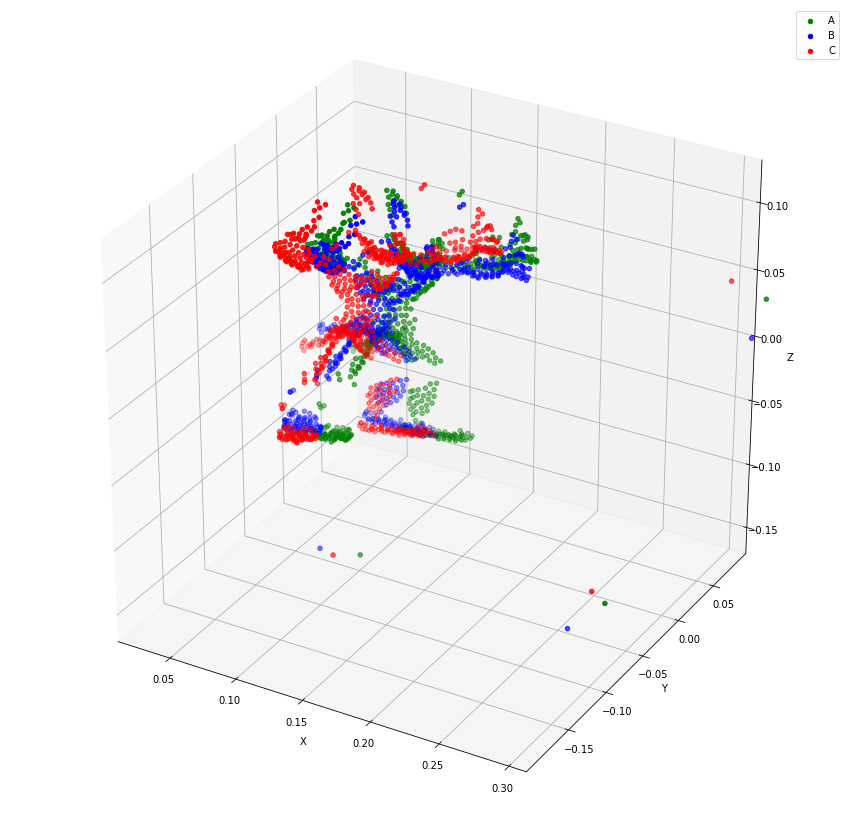

In [15]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.set_xlim(axes_lims[0], axes_lims[3])
ax.set_ylim(axes_lims[1], axes_lims[4])
ax.set_zlim(axes_lims[2], axes_lims[5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

for key in coords_dict:
    coords = transformation.transform(coords_dict[key], T_dict[key])
    ax.scatter(*coords.T, color=colors[key], label=key)
ax.legend()
plt.show()

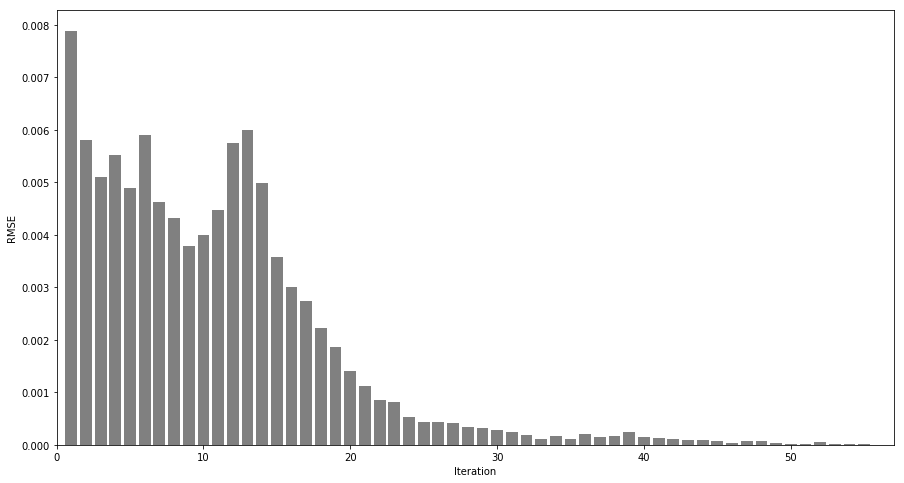

In [16]:
fig = plt.figure(figsize=(15, 8))
plt.xlim(0, len(report['RMSE']) + 1)
plt.xlabel('Iteration')
plt.ylabel('RMSE')

plt.bar(np.arange(len(report['RMSE']))+1, report['RMSE'], color='gray')
plt.show()

In [17]:
normals_dict = {
    key: normals.fit_normals(coords_dict[key], k=5, preferred=[0, -1, 0])
    for key in coords_dict
}

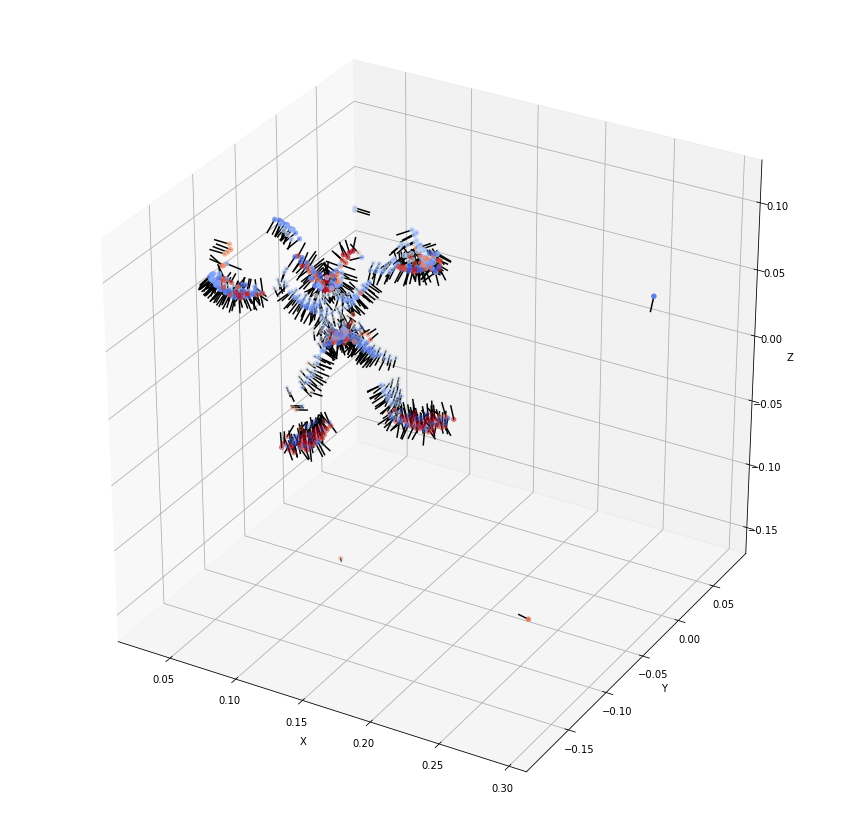

In [18]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.set_xlim(axes_lims[0], axes_lims[3])
ax.set_ylim(axes_lims[1], axes_lims[4])
ax.set_zlim(axes_lims[2], axes_lims[5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(*A.coords.T, c=normals_dict['A'][:, 2], cmap='coolwarm')
for coord, normal in zip(coords_dict['A'], normals_dict['A']):
    ax.plot(*np.vstack([coord, coord + normal*0.01]).T, color='black')
plt.show()

In [19]:
n_th = np.sin(15 * np.pi / 180)
radii = [d_th, d_th, d_th, n_th, n_th, n_th]
nicp = registration.ICP(
    radii,
    max_iter=60,
    max_change_ratio=0.000001,
    update_normals=True,
    k=1
)

In [20]:
T_dict, pairs_dict, report = nicp(coords_dict, normals_dict)

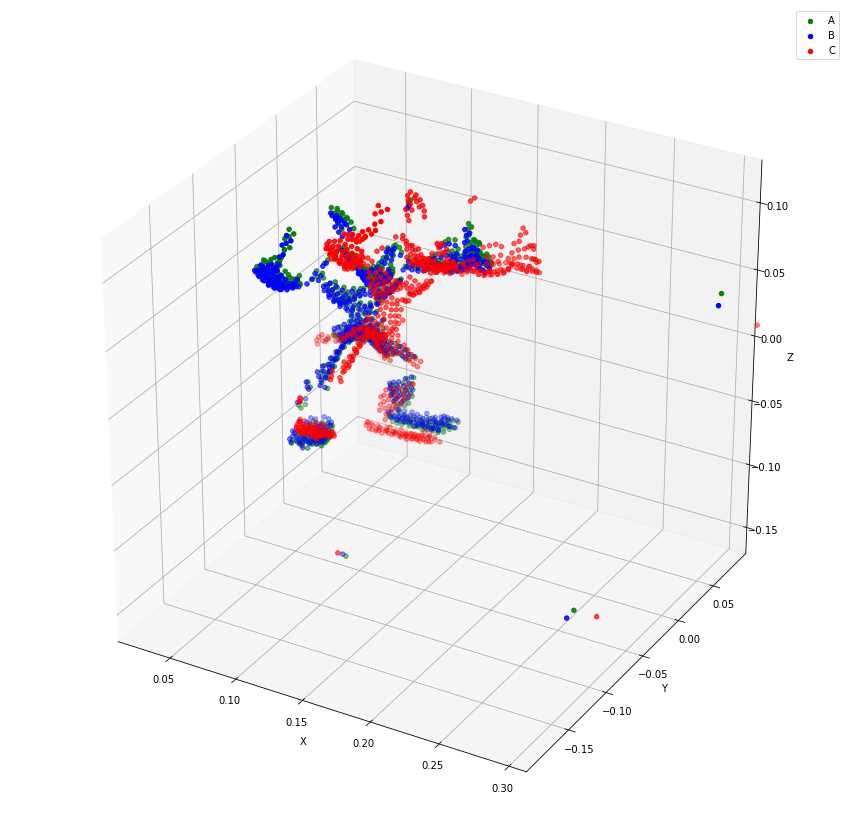

In [21]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.set_xlim(axes_lims[0], axes_lims[3])
ax.set_ylim(axes_lims[1], axes_lims[4])
ax.set_zlim(axes_lims[2], axes_lims[5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

for key in coords_dict:
    coords = transformation.transform(coords_dict[key], T_dict[key])
    ax.scatter(*coords.T, color=colors[key], label=key)
ax.legend()
plt.show()

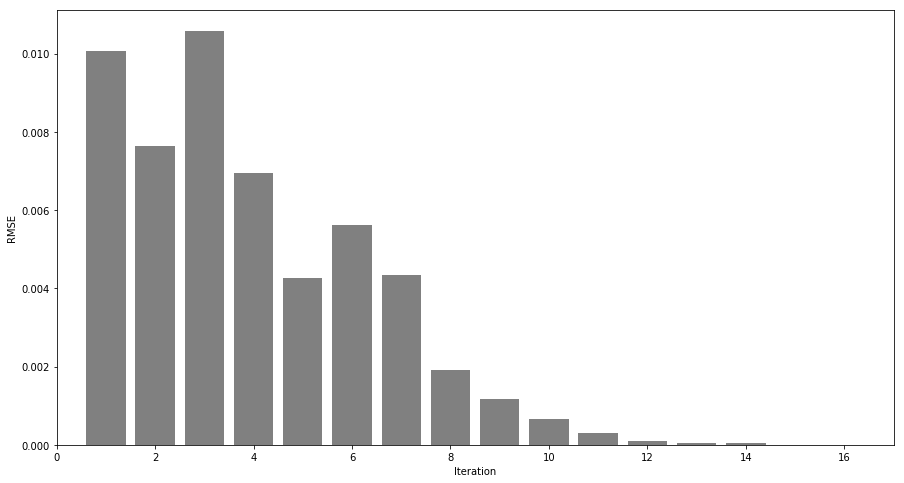

In [22]:
fig = plt.figure(figsize=(15, 8))
plt.xlim(0, len(report['RMSE']) + 1)
plt.xlabel('Iteration')
plt.ylabel('RMSE')

plt.bar(np.arange(len(report['RMSE']))+1, report['RMSE'], color='gray')
plt.show()

In [23]:
A_2 = storage.loadPly('data/ArmadilloBack/ArmadilloBack_0.ply')
print(A.shape)
print(A.dtype.descr)

B_2 = storage.loadPly('data/ArmadilloBack/ArmadilloBack_30.ply')
print(B.shape)
print(B.dtype.descr)

C_2 = storage.loadPly('data/ArmadilloBack/ArmadilloBack_60.ply')
print(C.shape)
print(C.dtype.descr)

r = 0.004
A = A[list(filters.ball(A.indexKD(), r))]
B = B[list(filters.ball(B.indexKD(), r))]
C = C[list(filters.ball(C.indexKD(), r))]

T_A = transformation.r_matrix([0, 0, 0])
A_2.transform(T_A)
T_B = transformation.r_matrix([0, 0, 0])
B_2.transform(T_B)
T_C = transformation.r_matrix([0, 0, 0])
C_2.transform(T_C)

coords_dict = {
    'A': A_2.coords,
    'B': B_2.coords,
    'C': C_2.coords
}

normals_dict = {
    key: normals.fit_normals(coords_dict[key], k=5, preferred=[0, -1, 0])
    for key in coords_dict
}

T_dict, pairs_dict, report = nicp(coords_dict, normals_dict)


axes_lims = Extent([
    A_2.extent().center - 0.5 * A_2.extent().ranges.max(),
    A_2.extent().center + 0.5 * A_2.extent().ranges.max()
])
colors = {'A': 'green', 'B': 'blue', 'C': 'red'}

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.set_xlim(axes_lims[0], axes_lims[3])
ax.set_ylim(axes_lims[1], axes_lims[4])
ax.set_zlim(axes_lims[2], axes_lims[5])
fig.tight_layout()

# initializing plot
artists={
    key: ax.plot([],[],[], '.', color=colors[key], label=key)[0]
    for key in coords_dict
}
ax.legend()

# collecting the roto-translation matrices
T_iter = [{key: np.eye(4) for key in coords_dict}] + report['T']

def animate(i):
    # updates the frame
    ax.set_xlabel('Iteration %i' % i)
    for key in coords_dict:
            coords = transformation.transform(coords_dict[key], T_iter[i][key])
            artists[key].set_data(coords[:, 0], coords[:, 1])
            artists[key].set_3d_properties(coords[:, 2])
    return artists.values()

# creates the animation
anim = animation.FuncAnimation(fig, animate, frames=range(len(T_iter)), interval=250, blit=True)

# save as GIF
anim.save('./data/nicp.gif', writer='pillow', fps=10)
plt.close()
# display as HTML (online version only)
HTML(anim.to_jshtml())

(670,)
[('coords', '>f4', (3,))]
(663,)
[('coords', '>f4', (3,))]
(672,)
[('coords', '>f4', (3,))]
